In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Customer-Churn-Records.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [ ]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [ ]:
df.shape

(10000, 18)

In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [ ]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

In [ ]:
df['Card Type'].value_counts()

DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: Card Type, dtype: int64

In [ ]:
df1=df['Exited'].value_counts()
print(df1)

0    7962
1    2038
Name: Exited, dtype: int64


In [ ]:
df2=pd.DataFrame()
df2['Total_customers']=df.groupby('Geography').CustomerId.count()
df2
df2['Exited_customers']=df[df.Exited==1].groupby('Geography').CustomerId.count()
df2['Churn_percentage']=df2.Exited_customers/df2.Total_customers*100
df2


,Total_customers,Exited_customers,Churn_percentage
Geography,,,
France,5014,811,16.174711
Germany,2509,814,32.443204
Spain,2477,413,16.673395


In [ ]:
df3=pd.DataFrame()
df3['Total_customers']=df.groupby('Gender').CustomerId.count()
df3['Exited_customers']=df[df.Exited==1].groupby('Gender').CustomerId.count()
df3['Churn_percentage']=df3.Exited_customers/df3.Total_customers*100
df3

,Total_customers,Exited_customers,Churn_percentage
Gender,,,
Female,4543,1139,25.071539
Male,5457,899,16.474253


In [ ]:
df4=pd.DataFrame()
df4['Total_customers']=df.groupby('Card Type').CustomerId.count()
df4['Exited_customers']=df[df.Exited==1].groupby('Card Type').CustomerId.count()
df4['Churn_percentage']=df4.Exited_customers/df4.Total_customers*100
df4

,Total_customers,Exited_customers,Churn_percentage
Card Type,,,
DIAMOND,2507,546,21.779019
GOLD,2502,482,19.264588
PLATINUM,2495,508,20.360721
SILVER,2496,502,20.112179


In [ ]:
df5=pd.DataFrame()
df5['Total_customers']=df.groupby('age_group').CustomerId.count()
df5['Exited_customers']=df[df.Exited==1].groupby('age_group').CustomerId.count()
df5['Churn_percentage']=df5.Exited_customers/df5.Total_customers*100
df5.sort_values(by='Churn_percentage',ascending=False)


,Total_customers,Exited_customers,Churn_percentage
age_group,,,
46 to 55,1311,663,50.572082
56 to 65,536,259,48.320896
36 to 45,3736,734,19.646681
66 to 75,219,34,15.525114
26 to 35,3542,301,8.498024
17 to 25,611,46,7.528642
76 to 85,42,1,2.380952
86 to 95,3,0,0.000000


In [ ]:
df6=df.describe()
df6

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [ ]:
df['age_group']=pd.cut(x=df['Age'],bins=[17,25,35,45,55,65,75,85,95],labels=['17 to 25','26 to 35','36 to 45','46 to 55','56 to 65','66 to 75','76 to 85','86 to 95'])
print(df['age_group'])

0       36 to 45
1       36 to 45
2       36 to 45
3       36 to 45
4       36 to 45
          ...   
9995    36 to 45
9996    26 to 35
9997    36 to 45
9998    36 to 45
9999    26 to 35
Name: age_group, Length: 10000, dtype: category
Categories (8, object): ['17 to 25' < '26 to 35' < '36 to 45' < '46 to 55' < '56 to 65' < '66 to 75' <
                         '76 to 85' < '86 to 95']


In [ ]:
#df['Tenure']
df7=pd.DataFrame()
df7['Total_customers']=df.groupby('Tenure').CustomerId.count()
df7['Exited_customers']=df[df.Exited==1].groupby('Tenure').CustomerId.count()
df7['Churn_percentage']=df7.Exited_customers/df7.Total_customers*100
df7.sort_values(by='Churn_percentage',ascending=False)

,Total_customers,Exited_customers,Churn_percentage
Tenure,,,
0,413,95,23.002421
1,1035,232,22.415459
9,984,214,21.747967
3,1009,213,21.110010
5,1012,209,20.652174
10,490,101,20.612245
4,989,203,20.525784
6,967,196,20.268873
8,1025,197,19.219512


In [ ]:
df['balance_group']=pd.cut(x=df['Balance'],bins=[0,50000,100000,150000,200000,250000],labels=['0 to 50000','50001 to 100000','100001 to 150000','150001 to 200000','200001 to 250000'])
print(df['balance_group'])

0                    NaN
1        50001 to 100000
2       150001 to 200000
3                    NaN
4       100001 to 150000
              ...       
9995                 NaN
9996     50001 to 100000
9997                 NaN
9998     50001 to 100000
9999    100001 to 150000
Name: balance_group, Length: 10000, dtype: category
Categories (5, object): ['0 to 50000' < '50001 to 100000' < '100001 to 150000' < '150001 to 200000' <
                         '200001 to 250000']


In [ ]:
df8=pd.DataFrame()
df8['Total_customers']=df.groupby('balance_group').CustomerId.count()
df8['Exited_customers']=df[df.Exited==1].groupby('balance_group').CustomerId.count()
df8['Churn_percentage']=df8.Exited_customers/df8.Total_customers*100
df8.sort_values(by='Churn_percentage',ascending=False)

,Total_customers,Exited_customers,Churn_percentage
balance_group,,,
200001 to 250000,33,18,54.545455
0 to 50000,75,26,34.666667
100001 to 150000,3830,987,25.770235
150001 to 200000,935,205,21.925134
50001 to 100000,1509,301,19.946985


In [ ]:

df10=pd.DataFrame()
df10['Total_customers']=df.groupby('NumOfProducts').CustomerId.count()
df10['Exited_customers']=df[df.Exited==1].groupby('NumOfProducts').CustomerId.count()
df10['Churn_percentage']=df10.Exited_customers/df10.Total_customers*100
df10.sort_values(by='Churn_percentage',ascending=False)

,Total_customers,Exited_customers,Churn_percentage
NumOfProducts,,,
4,60,60,100.000000
3,266,220,82.706767
1,5084,1409,27.714398
2,4590,349,7.603486


In [ ]:
df11=pd.DataFrame()
df11['Total_customers']=df.groupby('HasCrCard').CustomerId.count()
df11['Exited_customers']=df[df.Exited==1].groupby('HasCrCard').CustomerId.count()
df11['Churn_percentage']=df11.Exited_customers/df11.Total_customers*100
df11.sort_values(by='Churn_percentage',ascending=False)

,Total_customers,Exited_customers,Churn_percentage
HasCrCard,,,
0,2945,613,20.814941
1,7055,1425,20.198441


In [ ]:
df['credit_card_only']=df.apply(lambda x: 1 if (x['HasCrCard']==1)&(x['NumOfProducts']==1) else 0, axis=1 )
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,balance_group,EstimatedSalary_group,credit_card_only
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,1,101348.88,1,1,2,DIAMOND,464,NaN,100001 to 150000,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,1,112542.58,0,1,3,DIAMOND,456,50001 to 100000,100001 to 150000,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,0,113931.57,1,1,3,DIAMOND,377,150001 to 200000,100001 to 150000,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,0,93826.63,0,0,5,GOLD,350,NaN,50001 to 100000,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,1,79084.10,0,0,5,GOLD,425,100001 to 150000,50001 to 100000,1


In [ ]:
#credit_card_only
df14=pd.DataFrame()
df14['Total_customers']=df.groupby('credit_card_only').CustomerId.count()
df14['Exited_customers']=df[df.Exited==1].groupby('credit_card_only').CustomerId.count()
df14['Churn_percentage']=df14.Exited_customers/df14.Total_customers*100
df14.sort_values(by='Churn_percentage',ascending=False)

,Total_customers,Exited_customers,Churn_percentage
credit_card_only,,,
1,3578,991,27.697037
0,6422,1047,16.303332


In [ ]:
#IsActiveMember
df12=pd.DataFrame()
df12['Total_customers']=df.groupby('IsActiveMember').CustomerId.count()
df12['Exited_customers']=df[df.Exited==1].groupby('IsActiveMember').CustomerId.count()
df12['Churn_percentage']=df12.Exited_customers/df12.Total_customers*100
df12.sort_values(by='Churn_percentage',ascending=False)

,Total_customers,Exited_customers,Churn_percentage
IsActiveMember,,,
0,4849,1303,26.871520
1,5151,735,14.269074


In [ ]:
#df['EstimatedSalary']
df['EstimatedSalary_group']=pd.cut(x=df['EstimatedSalary'],bins=[0,50000,100000,150000,200000,250000],labels=['0 to 50000','50001 to 100000','100001 to 150000','150001 to 200000','200001 to 250000'])
print(df['EstimatedSalary_group'])

0       100001 to 150000
1       100001 to 150000
2       100001 to 150000
3        50001 to 100000
4        50001 to 100000
              ...       
9995     50001 to 100000
9996    100001 to 150000
9997          0 to 50000
9998     50001 to 100000
9999          0 to 50000
Name: EstimatedSalary_group, Length: 10000, dtype: category
Categories (5, object): ['0 to 50000' < '50001 to 100000' < '100001 to 150000' < '150001 to 200000' <
                         '200001 to 250000']


In [ ]:
df13=pd.DataFrame()
df13['Total_customers']=df.groupby('EstimatedSalary_group').CustomerId.count()
df13['Exited_customers']=df[df.Exited==1].groupby('EstimatedSalary_group').CustomerId.count()
df13['Churn_percentage']=df13.Exited_customers/df13.Total_customers*100
df13.sort_values(by='Churn_percentage',ascending=False)

,Total_customers,Exited_customers,Churn_percentage
EstimatedSalary_group,,,
150001 to 200000,2455,528,21.507128
100001 to 150000,2555,517,20.234834
0 to 50000,2453,489,19.934774
50001 to 100000,2537,504,19.865983
200001 to 250000,0,0,NaN


In [ ]:
df15=pd.DataFrame()
df15['Total_customers']=df.groupby('Complain').CustomerId.count()
df15['Exited_customers']=df[df.Exited==1].groupby('Complain').CustomerId.count()
df15['Churn_percentage']=df15.Exited_customers/df15.Total_customers*100
df15.sort_values(by='Churn_percentage',ascending=False)

,Total_customers,Exited_customers,Churn_percentage
Complain,,,
1,2044,2034,99.510763
0,7956,4,0.050277


In [ ]:
#df['Satisfaction Score']
df16=pd.DataFrame()
df16['Total_customers']=df.groupby('Satisfaction Score').CustomerId.count()
df16['Exited_customers']=df[df.Exited==1].groupby('Satisfaction Score').CustomerId.count()
df16['Churn_percentage']=df16.Exited_customers/df16.Total_customers*100
df16.sort_values(by='Churn_percentage',ascending=False)

,Total_customers,Exited_customers,Churn_percentage
Satisfaction Score,,,
2,2014,439,21.797418
4,2008,414,20.617530
1,1932,387,20.031056
5,2004,397,19.810379
3,2042,401,19.637610


In [ ]:
df3=df.groupby('Exited')['Card Type'].value_counts()
df4=df.groupby('Geography')['Exited'].value_counts()
print(df3+df4)

Exited  Card Type  Geography
0       GOLD       France       6223
                   Germany      3715
                   Spain        4084
        SILVER     France       6197
                   Germany      3689
                   Spain        4058
        PLATINUM   France       6190
                   Germany      3682
                   Spain        4051
        DIAMOND    France       6164
                   Germany      3656
                   Spain        4025
1       DIAMOND    France       1357
                   Germany      1360
                   Spain         959
        PLATINUM   France       1319
                   Germany      1322
                   Spain         921
        SILVER     France       1313
                   Germany      1316
                   Spain         915
        GOLD       France       1293
                   Germany      1296
                   Spain         895
dtype: int64


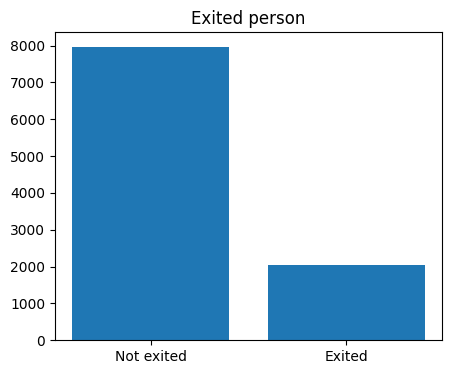

In [ ]:
plt.figure(figsize=(5,4))
plt.title("Exited person")
plt.bar(['Not exited','Exited'],df['Exited'].value_counts())
plt.show()

In [ ]:
df.groupby('Card Type')['Exited'].value_counts()

Card Type  Exited
DIAMOND    0         1961
           1          546
GOLD       0         2020
           1          482
PLATINUM   0         1987
           1          508
SILVER     0         1994
           1          502
Name: Exited, dtype: int64

AttributeError: ignored

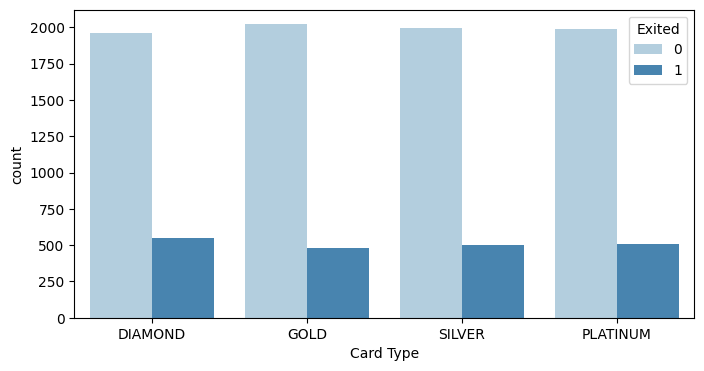

In [ ]:
plt.figure(figsize=(8,4))
ax1=sns.countplot(x='Card Type',hue='Exited',data=df,palette='Blues')
legend_labels,_=ax1.get_legend_handles_lables()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("card type")
plt.xlabel('card type')
plt.ylabel('no of person exited')
plt.legend(['Not exited','exited'])
plt.show()

In [ ]:
df.groupby('Gender')['Exited'].value_counts()

Gender  Exited
Female  0         3404
        1         1139
Male    0         4558
        1          899
Name: Exited, dtype: int64

In [ ]:
df.groupby('Geography')['Exited'].value_counts()

Geography  Exited
France     0         4203
           1          811
Germany    0         1695
           1          814
Spain      0         2064
           1          413
Name: Exited, dtype: int64

In [ ]:
a=df.groupby('Age')['Exited'].value_counts()

print(a)

Age  Exited
18   0         20
     1          2
19   0         26
     1          1
20   0         38
               ..
84   0          1
     1          1
85   0          1
88   0          1
92   0          2
Name: Exited, Length: 128, dtype: int64
